In [7]:
from src import *

## Description



GOAL: 

## Table of Contents
- [Emotion item data](#emotion)
    - Reformatting
    - Exploring
- [fMRI data](#fmri)
    - Reformatting
    - Exploring

In [8]:
emo_df = pd.read_csv('./data/emotion_compile.csv')

In [11]:
movie    = 'W_Sintel13.csv'
movie_df = emo_df[emo_df.filename==movie]
timeseries = [np.array(movie_df[movie_df['item']==e]['score'])
             for e in emo_df.item.unique()]
timeseries  = np.array(timeseries)

In [21]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([timeseries.T])[0]

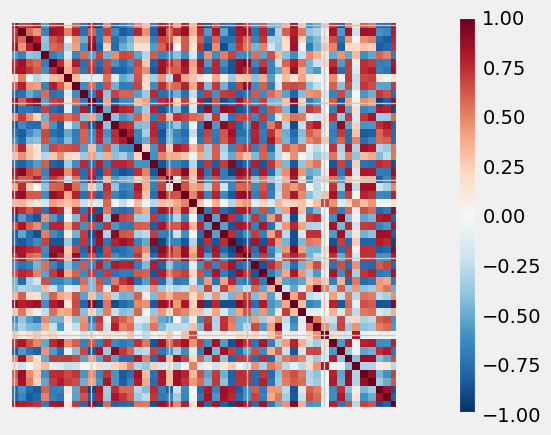

In [27]:
### NOTE: Perhaps do some re-ordering of labels, for now I don't know what to group
# useful for plotting connectivity interactions on glass brain
from nilearn import plotting
corr_plot = plotting.plot_matrix(correlation_matrix, figure=(5, 5), vmax=1, vmin=-1)

In [56]:
from brainspace.gradient import GradientMaps
emo_g = GradientMaps(n_components=10, approach='dm', kernel='pearson')
emo_g.fit(correlation_matrix)

GradientMaps(kernel='pearson')

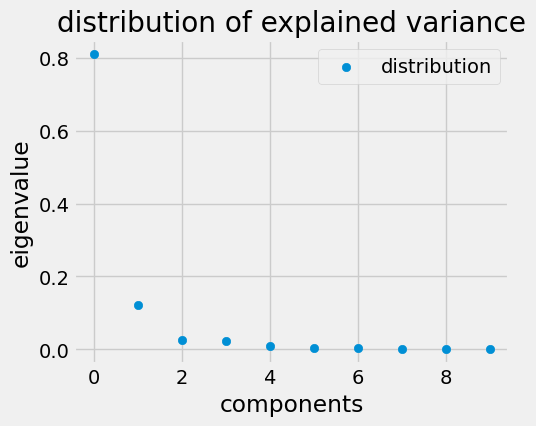

In [68]:
plot_eigenvector_importance(emo_g)

Text(0, 0.5, 'gradient2')

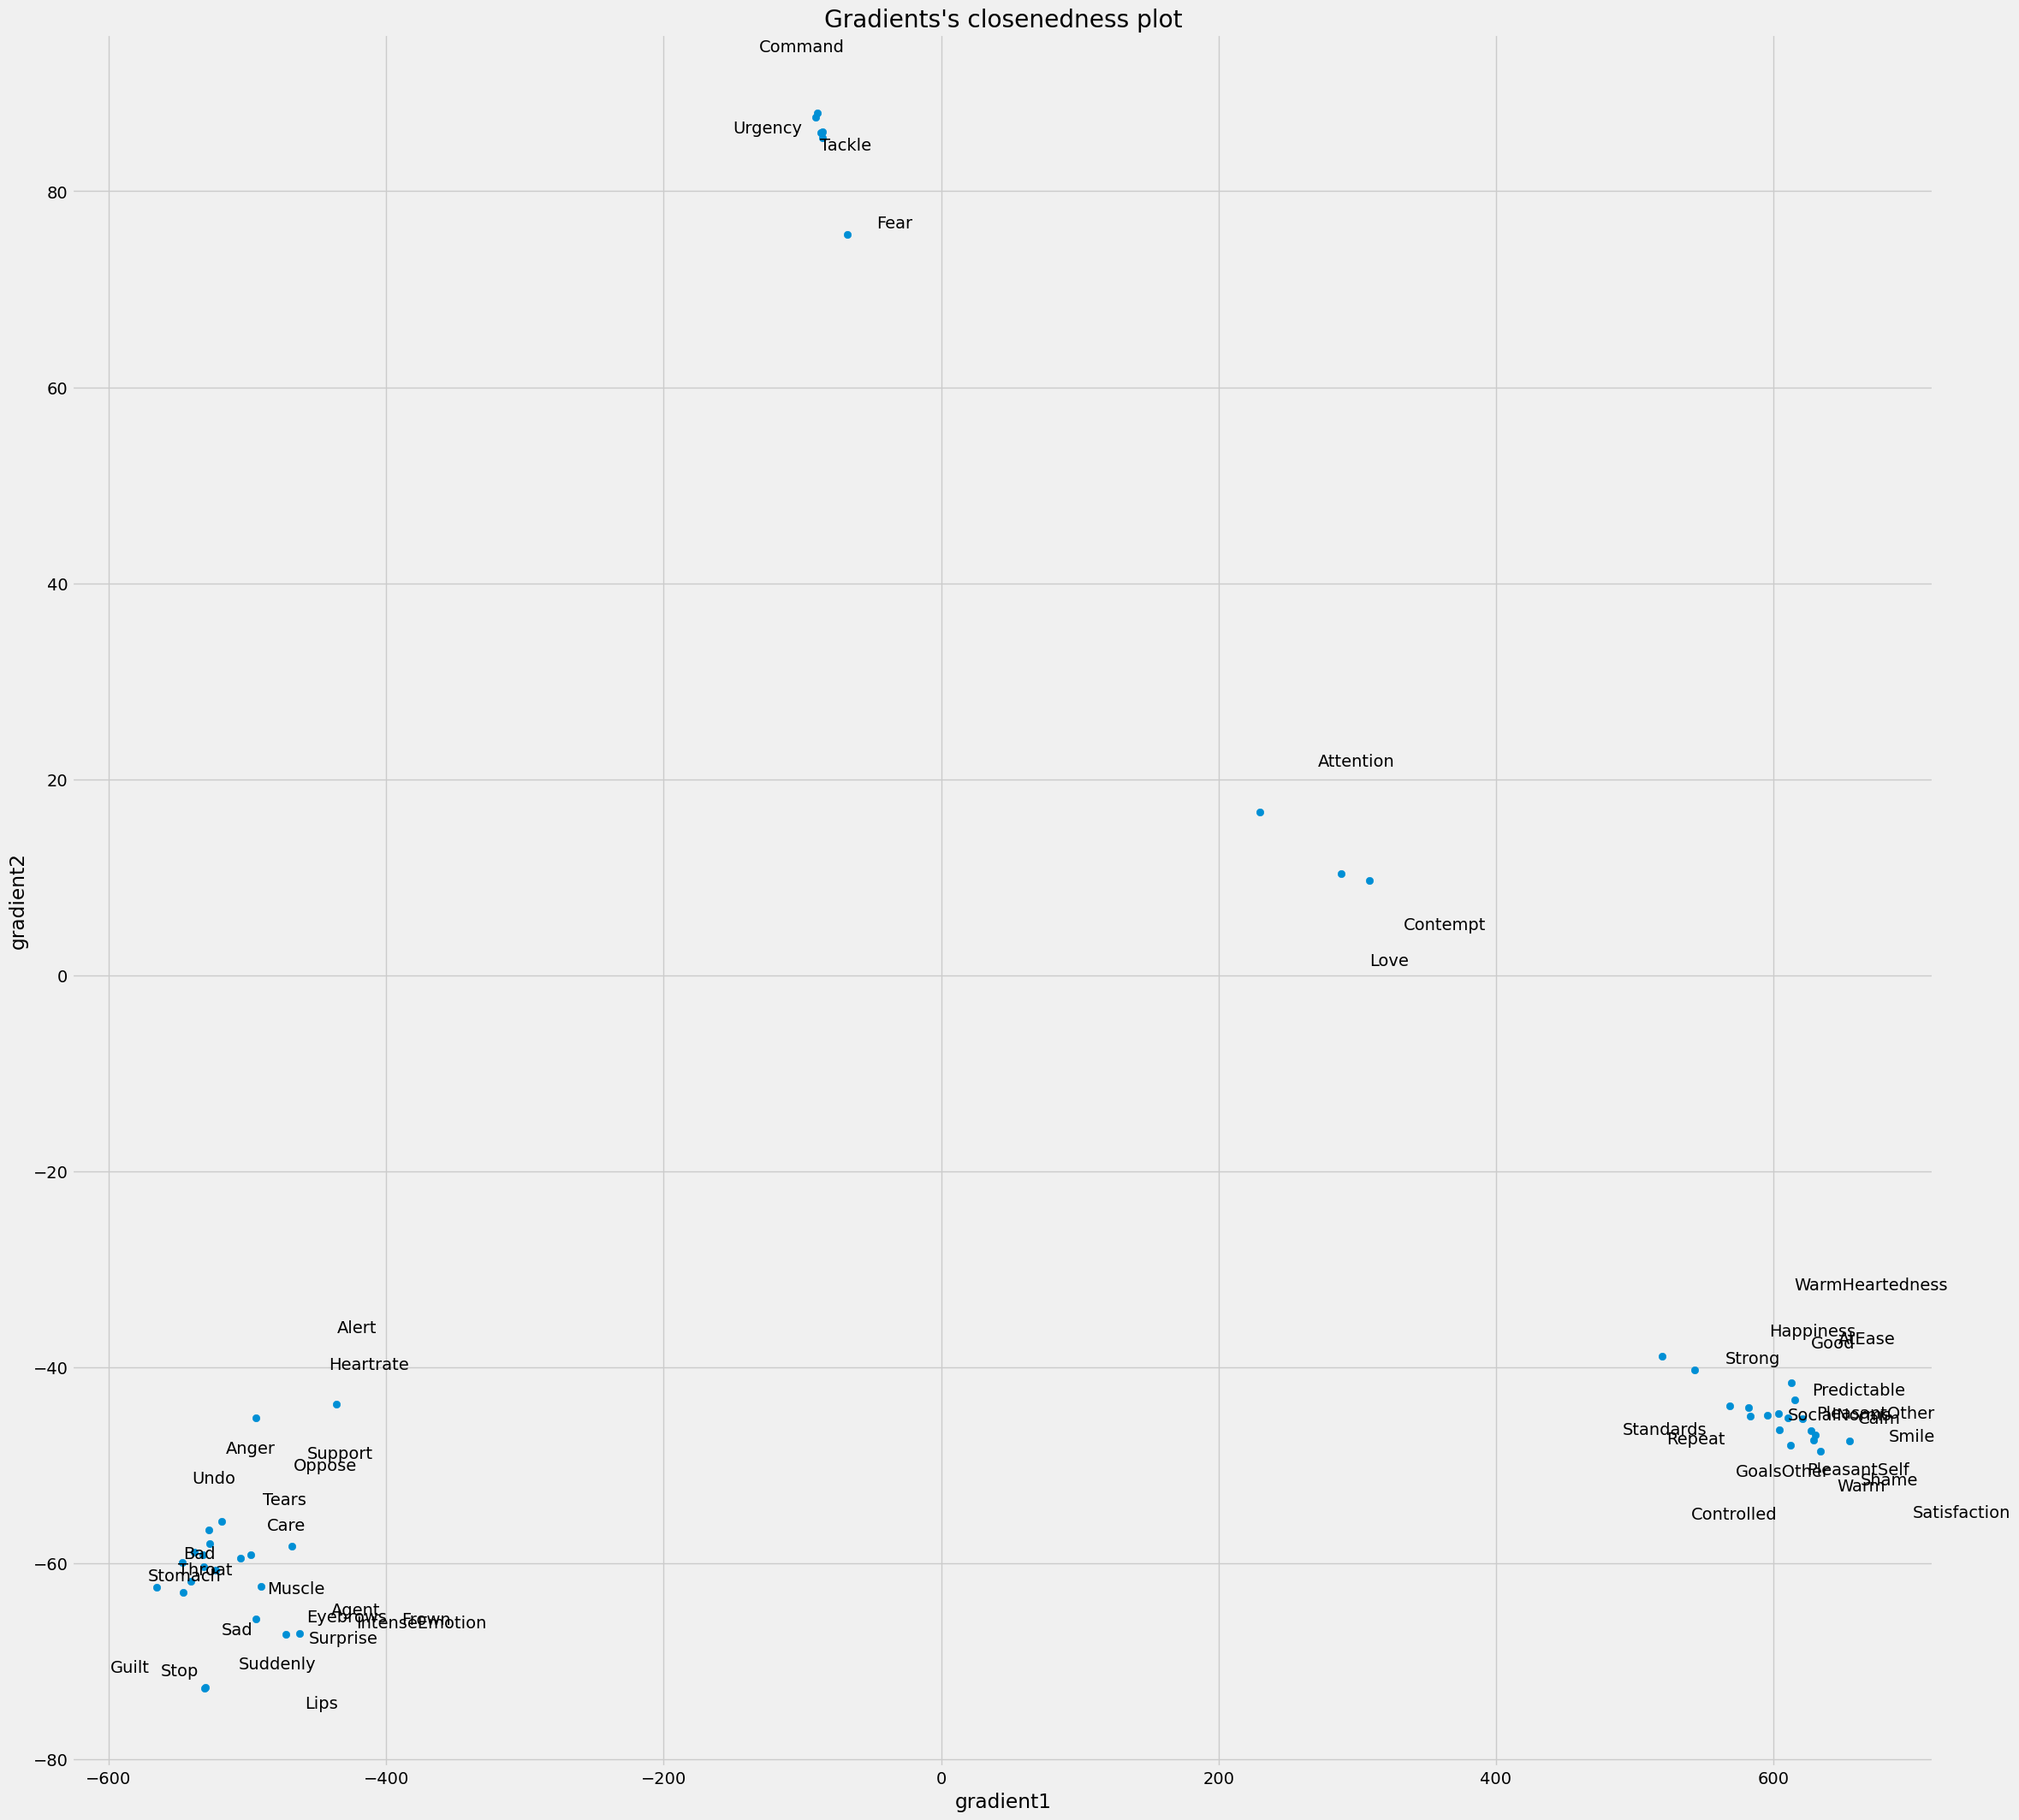

In [73]:
import random 
random.seed(2)
fig, ax = plt.subplots(1,1,figsize=(25,25))
ax.scatter(emo_g.gradients_[:,0], emo_g.gradients_[:,1])

scalerX = emo_g.gradients_[:,0].max()
scalerY = emo_g.gradients_[:,1].max()
for i, txt in enumerate(emo_df.item.unique()):
    spacingX = scalerX * (random.random()-0.5)/4
    spacingY = scalerY * (random.random()-0.5)/4
    
    ax.annotate(txt, (emo_g.gradients_[:,0][i] + spacingX,
                      emo_g.gradients_[:,1][i] + spacingY  ) )

ax.set_title("Gradients's closenedness plot")
ax.set_xlabel("gradient1")
ax.set_ylabel("gradient2")